# A5 - Analyzing Selected Repositories Code and Data
Esse notebook analisa características de código fonte e de dados.
Ele responde às questões de pesquisa: QP5, QP7, QP8

In [1]:
import sqlite3
import pandas as pd
import matplotlib.colors as mcolors

from collections import Counter
from matplotlib import pyplot as plt
from src.config.consts import DB_DIR
from src.helpers.h7_analysis_helpers import pastel_colormap
from src.helpers.h7_analysis_helpers import count

In [2]:
conn = sqlite3.connect(DB_DIR + '/final.sqlite')

# QP5 - Quantos dos projetos fazem uso de arquivos de dependências?

##  Requirement Files

In [ ]:
req_files = pd.read_sql_query("SELECT * FROM requirement_files", conn)

In [ ]:
req_files.state.value_counts()
print("Unique Repositories:", req_files.repository_id.nunique())

In [ ]:
fig1, ax1 = plt.subplots(figsize=(5,4.5))
zeros = 139041 - req_files.repository_id.nunique()
num_req_files_per_repo = req_files.groupby('repository_id').size().reset_index(name='Count')
req_per_repo_count = num_req_files_per_repo.Count.value_counts(bins = [0, 1,9,400]).sort_index()\
    .rename_axis('Number of Req Files').to_frame("Number of Repositories").reset_index(drop=False)
req_per_repo_count = pd.concat([pd.DataFrame({ 'Number of Rq Files': '0', 'Number of Repositories': zeros},
                                             index=[0]), req_per_repo_count]).reset_index(drop=True)
display(req_per_repo_count)
req_per_repo_count.plot.bar(ax=ax1, color='skyblue', xlabel='Arquivos de Dependência',
                            ylabel='Repositórios').get_legend().remove()
ax1.bar_label(ax1.containers[0], label_type='edge')
ax1.set_xticks(ticks=[0, 1, 2, 3], labels=['0', '1', '2-9', '≥ 10'], rotation=0)
fig1.savefig("outputs/a5/requirements_per_repo.png", dpi=500, bbox_inches='tight', format='png');

In [ ]:
fig2, ax2 = plt.subplots(figsize=(5,4.5))
req_files.reqformat.value_counts().plot.pie(ax=ax2, cmap=pastel_colormap(4), ylabel='', pctdistance=0.8,
             autopct=(lambda prct_value: '{:.2f}%\n{:.0f}'
                 .format(prct_value, (len(req_files) * prct_value / 100))) )
fig2.savefig("outputs/a5/requirements_type.png", dpi=500, bbox_inches='tight', format='png');

# QP7 - Qual o tamanho dos projetos?

## Python Files

In [ ]:
python_files = pd.read_sql_query("SELECT * FROM python_files", conn)
print('Total of Python Files:', len(python_files))

In [ ]:
print('Mean of Python Files:', len(python_files)/139041)
print("Unique Repositories:", python_files.repository_id.nunique())

In [ ]:
fig3, ax3 = plt.subplots( figsize=(6,4.5))
zeros = 139041 - python_files.repository_id.nunique()
num_python_files_per_repo = python_files.groupby('repository_id').size().reset_index(name='Count')
pf_per_repo_count = num_python_files_per_repo.Count.value_counts(bins = [0, 1,9,99,499,1000000]).sort_index()\
    .rename_axis('Number of Python Files').to_frame("Number of Repositories").reset_index(drop=False)
pf_per_repo_count = pd.concat([pd.DataFrame({ 'Number of Python Files': '0', 'Number of Repositories': zeros},
                                             index=[0]), pf_per_repo_count]).reset_index(drop=True)
pf_per_repo_count.plot.bar(ax=ax3, color='skyblue', xlabel='Python Files',
                            ylabel='Repositórios').get_legend().remove()

ax3.bar_label(ax3.containers[0], label_type='edge')
ax3.set_xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['0', '1', '2-9', '10-99', '100-499','≥ 500' ], rotation=0)
fig3.savefig("outputs/a5/pf_per_repo.png", dpi=500, bbox_inches='tight', format='png');

### Número de linhas dos arquivos Python

In [ ]:
fig3, ax3 = plt.subplots( figsize=(6,4.5))
total_lines = python_files.total_lines\
    .value_counts(dropna=False, bins = [-1, 0, 1, 99, 999, 4999,100000])\
    .sort_index().to_frame("Python Files")


total_lines.plot.bar(color='skyblue', ax=ax3,
                   xlabel='Número de Linhas', ylabel='Python Files').get_legend().remove()
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['0', '1', '2-99', '100-999', '1000-4999', '≥ 50000'], rotation=0)
ax3.bar_label(ax3.containers[0], label_type='edge')
fig3.savefig("outputs/a5/total_lines.png", dpi=500, bbox_inches='tight', format='png');

## Jupyter Notebooks

In [ ]:
notebooks = pd.read_sql_query("SELECT * FROM notebooks", conn)
print('Total of Notebooks:', len(notebooks))

In [ ]:
print('Mean of Notebooks: {:.2f}'.format(len(notebooks)/139041))
print("Unique Repositories:", notebooks.repository_id.nunique())

In [ ]:
fig5, ax5 = plt.subplots( figsize=(6,4.5))
zeros5 = 139041 - notebooks.repository_id.nunique()
num_notebooks_per_repo = notebooks.groupby('repository_id').size().reset_index(name='Count')
nb_per_repo_count = num_notebooks_per_repo.Count.value_counts(bins = [0, 1,9,99,499,1000000]).sort_index()\
    .rename_axis('Number of Notebooks').to_frame("Number of Repositories").reset_index(drop=False)
nb_per_repo_count = pd.concat([pd.DataFrame({ 'Number of Notebooks': '0', 'Number of Repositories': zeros5},
                                             index=[0]), nb_per_repo_count]).reset_index(drop=True)
nb_per_repo_count.plot.bar(ax=ax5, color='#FFCED1', xlabel='Jupyter Notebooks',
                            ylabel='Repositórios').get_legend().remove()

ax5.bar_label(ax5.containers[0], label_type='edge')
ax5.set_xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['0', '1', '2-9', '10-99', '100-499','≥ 500' ], rotation=0)
fig5.savefig("outputs/a5/nb_per_repo.png", dpi=500, bbox_inches='tight', format='png');

# QP8. Como estão organizados os Jupyter Notebooks?

### Tipos das Células

In [ ]:
cell_types = pd.read_sql_query("SELECT cell_type, count(*) from cells group by cell_type;", conn)

In [ ]:
cell_types.loc[1] = ['code', cell_types.loc[1]["count(*)"] + cell_types.loc[0]["count(*)"]]
cell_types.loc[3] = ['markdown', cell_types.loc[3]["count(*)"] + cell_types.loc[4]["count(*)"] + cell_types.loc[2]["count(*)"]]
cell_types = cell_types.drop(0)
cell_types = cell_types.drop(2)
cell_types = cell_types.drop(4)
display(cell_types)

In [ ]:
fig4, ax4 = plt.subplots(figsize=(5, 5))
cell_types.plot.pie(ax=ax4, y='count(*)', x='cell_type',cmap=mcolors.ListedColormap(['#FFCED1', '#CDE7F0', '#AEEAC6']),
                    labels=[ "Código", "Markdown", "Raw"], ylabel='',
                    autopct=(lambda prct_value: '{:.2f}%\n{:.0f}'
                             .format(prct_value, (cell_types['count(*)'].sum() * prct_value / 100)))
                    ).get_legend().remove()
fig4.savefig("outputs/a5/cell_types.png", dpi=500, format='png')

### Número de Células por Notebook

In [ ]:
fig2, ax2 = plt.subplots( figsize=(6,4.5))
total_cells = notebooks.total_cells\
    .value_counts(dropna=False, bins = [-1, 0, 1, 9, 49, 99, 999, 100000])\
    .sort_index().to_frame("Notebooks")


total_cells.plot.bar(color='skyblue', ax=ax2,
                   xlabel='Células', ylabel='Notebooks').get_legend().remove()
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['0', '1', '2-9', '10-49','50-99', '100-999','≥ 1000'], rotation=0)
ax2.bar_label(ax2.containers[0], label_type='edge')
fig2.savefig("outputs/a5/num_cells.png", dpi=500, bbox_inches='tight', format='png');

### Número de linhas por célula

In [ ]:
cell_lines = pd.read_sql_query("""SELECT'0-1' AS range, COUNT(CASE WHEN lines BETWEEN 0 AND 1 THEN 1 END) AS count
                                    FROM cells UNION ALL
                                    SELECT '2-9' AS range,
                                      COUNT(CASE WHEN lines BETWEEN 2 AND 9 THEN 1 END) AS count
                                    FROM cells UNION ALL
                                    SELECT '10-99' AS range,
                                      COUNT(CASE WHEN lines BETWEEN 10 AND 99 THEN 1 END) AS count
                                    FROM cells UNION ALL
                                    SELECT '100-499' AS range,
                                      COUNT(CASE WHEN lines BETWEEN 100 AND 499 THEN 1 END) AS count
                                    FROM cells UNION ALL
                                    SELECT '500+' AS range, COUNT(CASE WHEN lines >= 500 THEN 1 END) AS count
                                    FROM cells;
                                """,
                               conn)

In [ ]:
fig3, ax3 = plt.subplots( figsize=(10,5))
import matplotlib.ticker as ticker
cell_lines.plot.bar(color='skyblue', ax=ax3,
                   xlabel='Número de Linhas', ylabel='Cells').get_legend().remove()

plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['1', '2-9', '10-99', '100-499','≥ 500'], rotation=0)
ax3.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax3.xaxis.get_major_formatter().set_powerlimits((0, 0))

# Set the y-axis to scientific notation
ax3.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax3.yaxis.get_major_formatter().set_powerlimits((0, 0))
ax3.bar_label(ax3.containers[0],fmt='$%d$', label_type='edge');

# Markdown

In [3]:
notebook_markdowns = pd.read_sql_query("SELECT * FROM main.notebook_markdowns", conn)
print('Total of Notebook Markdowns:', len(notebook_markdowns))

Total of Notebook Markdowns: 945249


In [4]:
markdowns_counter = count( notebook_markdowns, "header",
                   "h1", "h2", "h3", "h4", "h5", "h6",
                    "hrule", "list", "table", "p", "quote",
                    "code", "image", "link", "autolink",
                    "codespan", "emphasis", "double_emphasis",
                    "strikethrough", "html", "math", "block_math", "latex"
)
common = markdowns_counter.most_common()
markdowns = pd.DataFrame([c for n, c in common], index=[n for n, c in common], columns=["Notebooks"])\
    .rename_axis('Elements').reset_index(drop=False)
display(markdowns)

,Elements,Notebooks
0,header,700355
1,p,649998
2,h1,544693
3,h2,481812
4,h3,380742
5,list,356927
6,double_emphasis,323022
7,html,302633
8,codespan,207750
9,link,204932


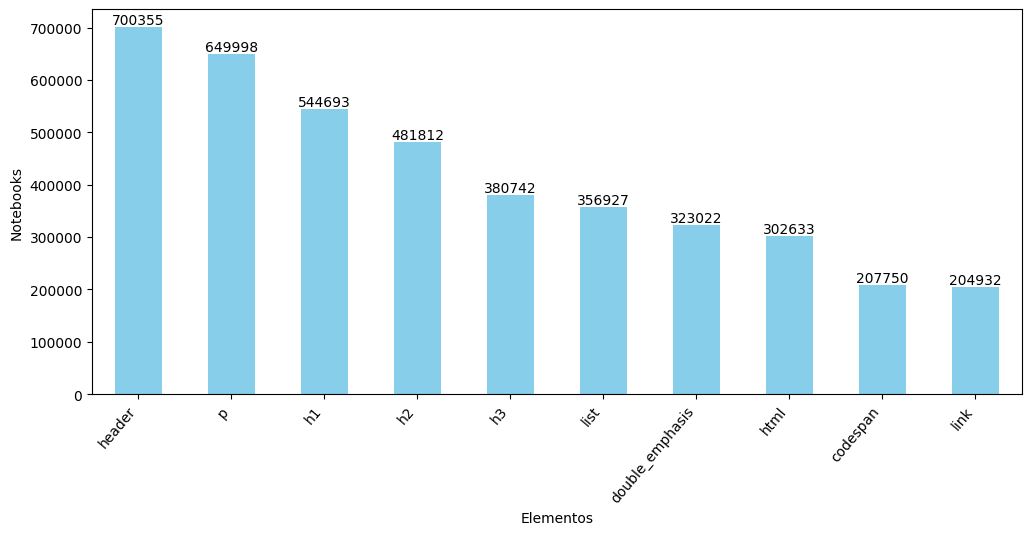

In [6]:
markdowns = markdowns[:10]
fig2, ax2 = plt.subplots(figsize=(12,5))
markdowns.plot.bar(ax=ax2, color="skyblue",
             xlabel='Elementos', ylabel= "Notebooks"
             ).get_legend().remove()
plt.xticks(ticks=[0, 1, 2, 3,4,5,6,7,8,9],
           labels=markdowns["Elements"], rotation=50, ha='right')
ax2.bar_label(ax2.containers[0], label_type='edge')
fig2.savefig("outputs/a5/markdown_elements.png", dpi=500, bbox_inches='tight', format='png');

In [33]:
idiomas_counter = Counter()
notebook_markdowns["main_language"].agg(lambda x: idiomas_counter.update({ y for y in x.split(",") if y }))
common = idiomas_counter.most_common()
idiomas = pd.DataFrame([c for n, c in common], index=[n for n, c in common], columns=["Notebooks"])\
    .rename_axis('Linguas').reset_index(drop=False)
display(idiomas)

,Linguas,Notebooks
0,english,643063
1,none,163207
2,portuguese,31287
3,spanish,18989
4,russian,15664
5,korean,11639
6,indonesian,7196
7,german,6377
8,french,6358
9,undetected,5459


In [34]:
idiomas = idiomas.drop(1)
idiomas = idiomas.drop(9)

In [35]:
idiomas1 = idiomas[:9]
others = pd.DataFrame(data = {
    'Linguas' : ['Outras'],
    'Notebooks' : [idiomas['Notebooks'][9:].sum()]
})

idiomas2 = pd.concat([idiomas1,others]).reset_index(drop=True)
display(idiomas2)

,Linguas,Notebooks
0,english,643063
1,portuguese,31287
2,spanish,18989
3,russian,15664
4,korean,11639
5,indonesian,7196
6,german,6377
7,french,6358
8,italian,5248
9,Outras,30762


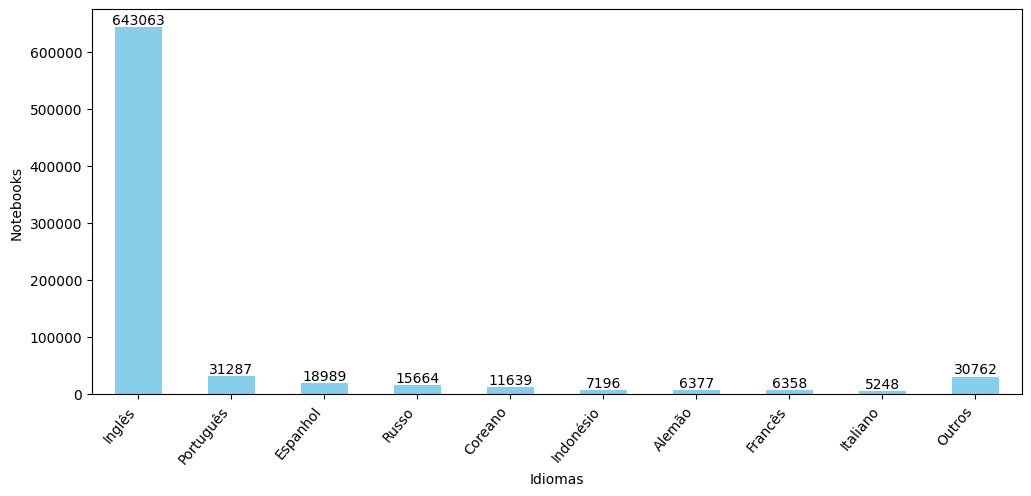

In [37]:
fig2, ax2 = plt.subplots(figsize=(12,5))
idiomas2.plot.bar(ax=ax2, color="skyblue",
             xlabel='Idiomas', ylabel= "Notebooks"
             ).get_legend().remove()
plt.xticks(ticks=[0, 1, 2, 3,4,5,6,7,8,9],
           labels=['Inglês', 'Português', 'Espanhol', 'Russo', 'Coreano', 'Indonésio',
                   'Alemão', 'Francês', 'Italiano', 'Outros'], rotation=50, ha='right')
ax2.bar_label(ax2.containers[0], label_type='edge')
fig2.savefig("outputs/a5/idiomas.png", dpi=500, bbox_inches='tight', format='png');

# QP9 - Quais são os tipos de arquivos dados mais utilizados?

## Data Files

In [3]:
data_ios = pd.read_sql_query("SELECT * FROM main.data_ios", conn)
print('Total of Data IO:', len(data_ios))

Total of Data IO: 1668908


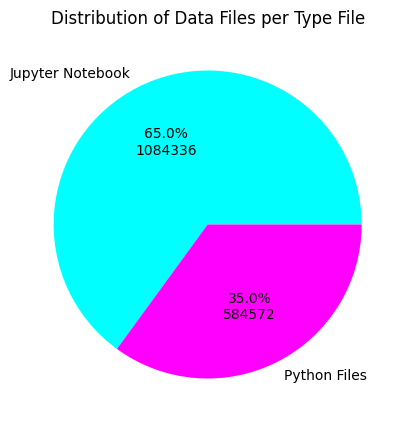

In [4]:
data_files = data_ios.type.value_counts().rename_axis("Types").to_frame("Data Files")
fig5, ax5 = plt.subplots(figsize=(5, 5))
data_files.plot \
    .pie(ax=ax5, y="Data Files", title="Distribution of Data Files per Type File",
         labels=[ "Jupyter Notebook", "Python Files"], ylabel='', cmap="cool",
         autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(prct_value, (data_files["Data Files"].sum()) * prct_value / 100))) \
    .get_legend().remove()

### Function AST Types
When representing python function calls as Abstract Syntax Trees (ASTs) they can either be Names or Attributes.

Names just call the function with its arguments `` read_txt("data.txt")``
where ``read_txt`` is the function Name and ``"data.txt"`` its argument.


Attributes on the other hand have to call the function ``pd.read_csv("data.csv")``
where pd is the caller (the module where the function is being called from),
``read_csv`` the function name and ``"data.csv"`` its arguments.

#### Function caller modules and names

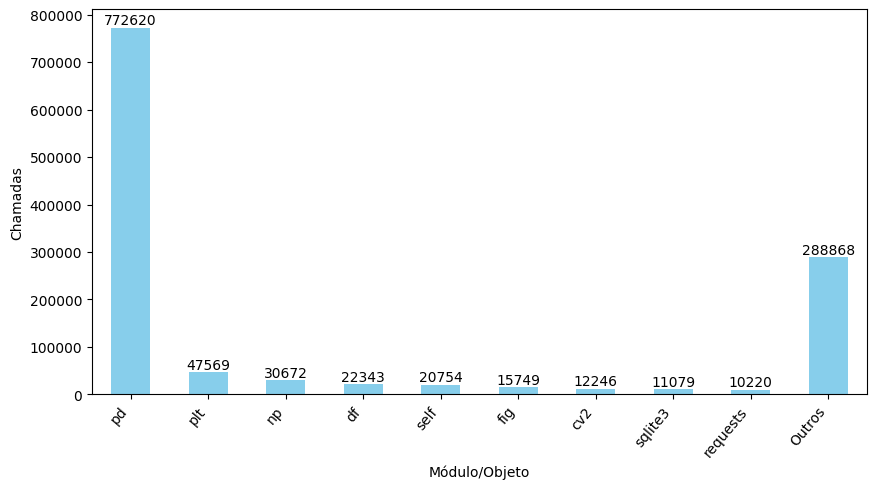

In [37]:
callers = data_ios.caller.dropna().value_counts().rename_axis("Caller").to_frame("Count").sort_values(by='Count', ascending=False)

other_value = callers[9:]["Count"].sum()
new_callers = callers[:9].copy()
new_callers.loc["Outros"] = [other_value]

fig7, ax7 = plt.subplots(figsize=(10, 5))
new_callers.plot.bar(ax=ax7, y="Count", color='skyblue',
                     xlabel='Módulo/Objeto', ylabel='Chamadas').get_legend().remove()
plt.xticks(rotation=50, ha='right')
ax7.bar_label(ax7.containers[0], label_type='edge');

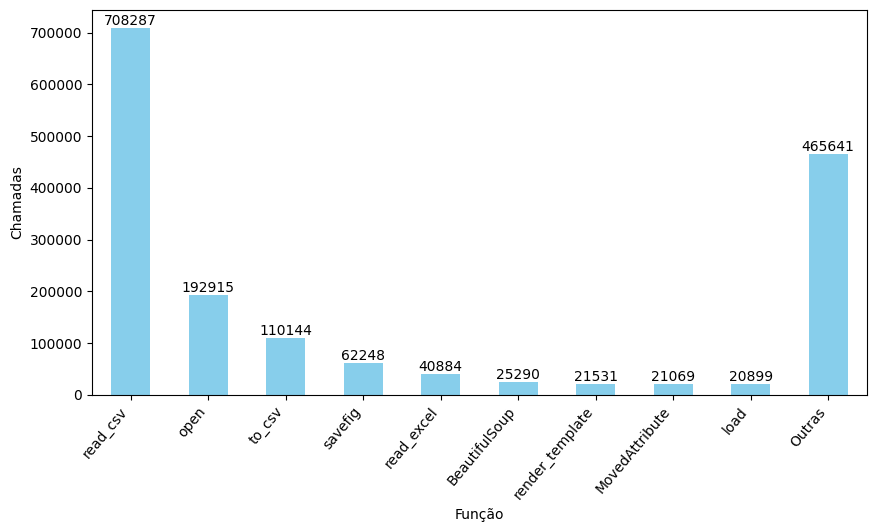

In [38]:
fig8, ax8 = plt.subplots(figsize=(10, 5))
names = data_ios.function_name.dropna().value_counts().rename_axis("Fnction").to_frame("Count")
other_value = names[9:]["Count"].sum()
new_names = names[:9].copy()
new_names.loc["Outras"] = [other_value]

new_names.plot.bar(ax=ax8, y="Count", color='skyblue',
                     xlabel='Função', ylabel='Chamadas').get_legend().remove()
plt.xticks(rotation=50, ha='right')
ax8.bar_label(ax8.containers[0], label_type='edge');

### Arguments

In [43]:
source_types = data_ios.infered_source_type.value_counts().rename_axis("Types").to_frame("Source Types")
display(source_types)

,Source Types
Types,
file,1547565
website,114002
email,7341


,Count
Extension,
csv,804394
txt,116838
png,80160
pkl,44220
xlsx,41897
json,40190
html,36987
parser,28744
jpg,30585


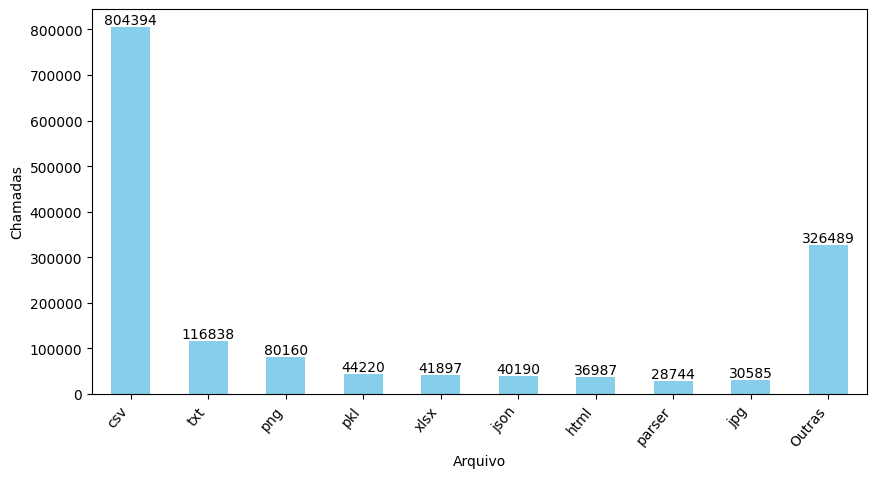

In [98]:
fig10, ax10 = plt.subplots(figsize=(10, 5))
extensions = data_ios.infered_file_extension.dropna().value_counts()\
    .rename_axis("Extension").to_frame("Count").sort_values(by='Count', ascending=False)
extensions.loc["jpg"].Count = extensions.loc["jpg"].Count +  extensions.loc["jpeg"].Count
other_value = extensions[9:]["Count"].sum()
new_extensions = extensions[:9].copy()
new_extensions.loc["Outras"] = [other_value]

display(new_extensions)

new_extensions.plot.bar(ax=ax10, y="Count", color='skyblue',
                     xlabel='Arquivo', ylabel='Chamadas').get_legend().remove()
plt.xticks(rotation=50, ha='right')
ax10.bar_label(ax10.containers[0], label_type='edge')
fig10.savefig("outputs/a5/extensões.png", dpi=500, bbox_inches='tight', format='png');

### Infered Types (Inputs / Outputs)

,Data Files
Types,
input,992610
unknown,510548
output,165750


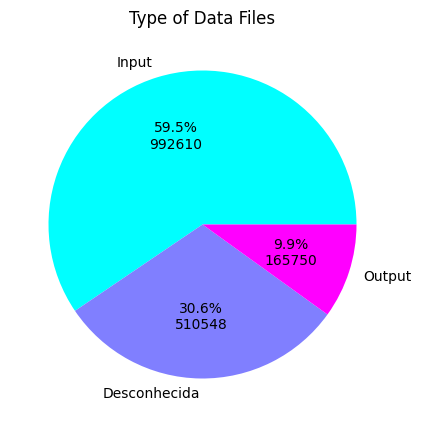

In [72]:
data_files = data_ios.infered_type.value_counts().rename_axis("Types").to_frame("Data Files")
display(data_files)
fig9, ax9 = plt.subplots(figsize=(5, 5))
data_files.plot \
    .pie(ax=ax9, y="Data Files", title="Type of Data Files",
 labels=[ "Input", 'Desconhecida', "Output"], ylabel='', cmap="cool",
         autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(prct_value, (data_files["Data Files"].sum()) * prct_value / 100))) \
    .get_legend().remove()

### Inputs
From functions considered data inputs, specifically, we have:

In [ ]:
inputs = data_ios[data_ios.infered_type == 'input']

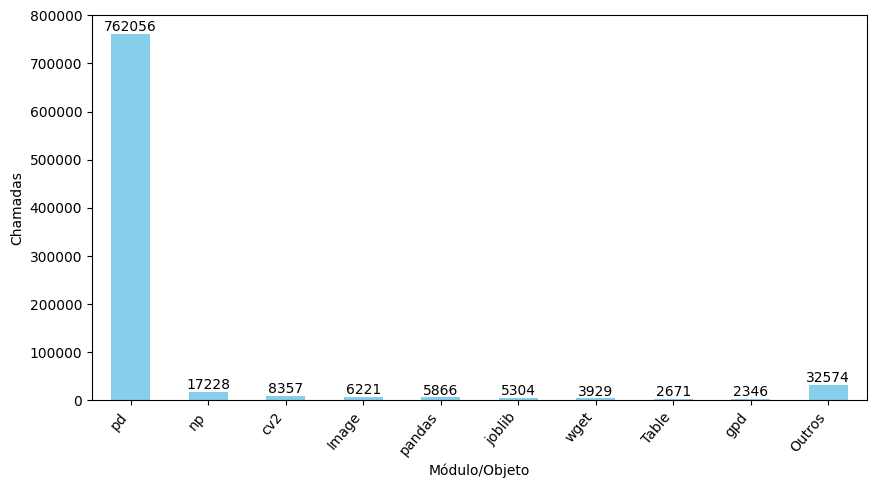

In [82]:
fig12, ax12 = plt.subplots(figsize=(10, 5))
callers = inputs.caller.dropna().value_counts().rename_axis("Caller").to_frame("Count")

other_value = callers[9:]["Count"].sum()
new_callers = callers[:9].copy()
new_callers.loc["Outros"] = [other_value]
new_callers.plot.bar(ax=ax12, y="Count", color='skyblue',
                     xlabel='Módulo/Objeto', ylabel='Chamadas de Entrada').get_legend().remove()
plt.xticks(rotation=50, ha='right')
ax12.bar_label(ax12.containers[0], label_type='edge');

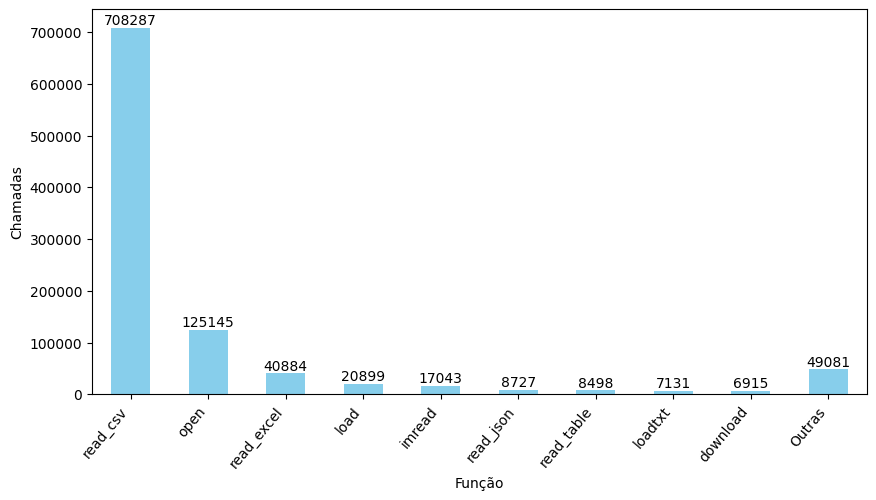

In [83]:
fig13, ax13 = plt.subplots(figsize=(10, 5))
names = inputs.function_name.dropna().value_counts().rename_axis("Function").to_frame("Count")
other_value = names[9:]["Count"].sum()
new_names = names[:9].copy()
new_names.loc["Outras"] = [other_value]
new_names.plot.bar(ax=ax13, y="Count", color='skyblue',
                     xlabel='Função', ylabel='Chamadas de Entrada').get_legend().remove()
plt.xticks(rotation=50, ha='right')
ax13.bar_label(ax13.containers[0], label_type='edge');

In [86]:
source_types = inputs.infered_source_type.value_counts().rename_axis("Types").to_frame("Source Types")
display(source_types)

,Source Types
Types,
file,911540
website,80900
email,170


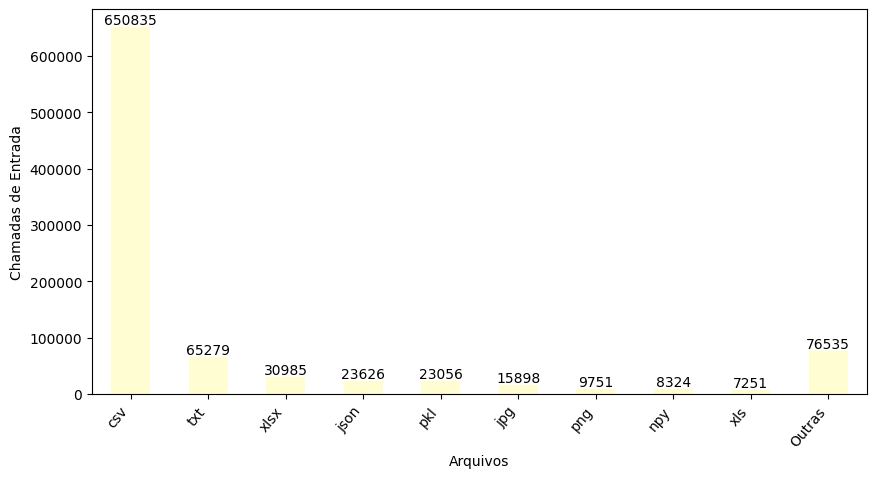

In [102]:
fig14, ax14 = plt.subplots(figsize=(10, 5))
extensions = inputs.infered_file_extension.dropna().value_counts().rename_axis("Extension").to_frame("Count")
other_value = extensions[9:]["Count"].sum()
new_extensions = extensions[:9].copy()
new_extensions.loc["Outras"] = [other_value]

new_extensions.plot.bar(ax=ax14, y="Count", color='#FFFDD1',
                     xlabel='Arquivos', ylabel='Chamadas de Entrada').get_legend().remove()
plt.xticks(rotation=50, ha='right')
ax14.bar_label(ax14.containers[0], label_type='edge')
fig14.savefig("outputs/a5/inputs.png", dpi=500, bbox_inches='tight', format='png');

### Outputs
From functions considered data outputs, specifically, we have:

In [90]:
outputs = data_ios[data_ios.infered_type == 'output']

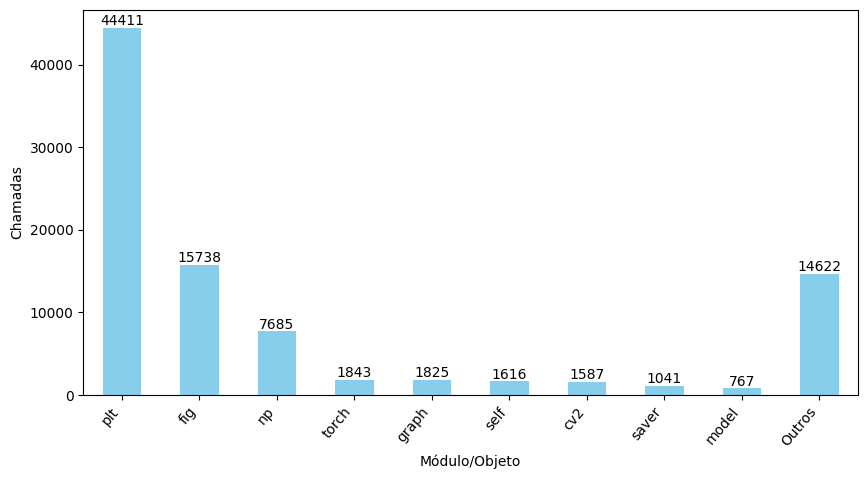

In [91]:
fig15, ax15 = plt.subplots(figsize=(10, 5))
callers = outputs.caller.dropna().value_counts().rename_axis("Caller").to_frame("Count")

other_value = callers[9:]["Count"].sum()
new_callers = callers[:9].copy()
new_callers.loc["Outros"] = [other_value]
new_callers.plot.bar(ax=ax15, y="Count", color='skyblue',
                     xlabel='Módulo/Objeto', ylabel='Chamadas de Saída').get_legend().remove()
plt.xticks(rotation=50, ha='right')
ax15.bar_label(ax15.containers[0], label_type='edge');

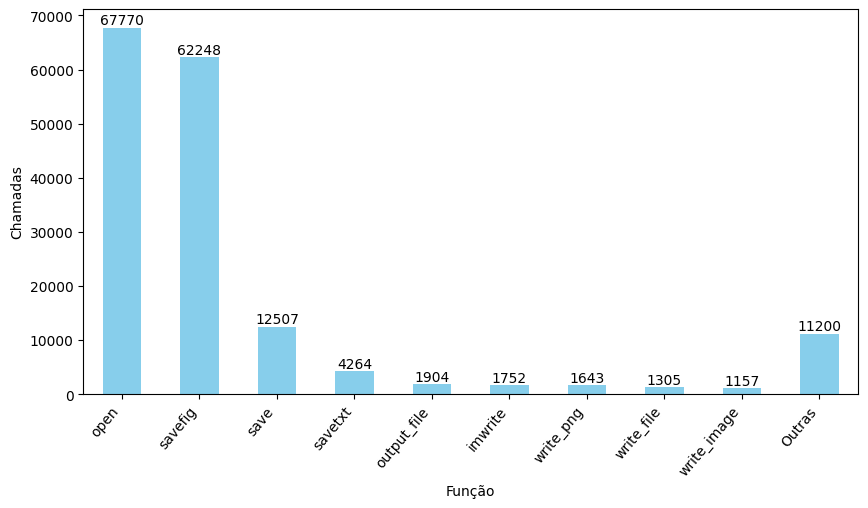

In [92]:
fig16, ax16 = plt.subplots(figsize=(10, 5))
names = outputs.function_name.dropna().value_counts().rename_axis("Function").to_frame("Count")
other_value = names[9:]["Count"].sum()
new_names = names[:9].copy()
new_names.loc["Outras"] = [other_value]
new_names.plot.bar(ax=ax16, y="Count", color='skyblue',
                     xlabel='Função', ylabel='Chamadas de Saída').get_legend().remove()
plt.xticks(rotation=50, ha='right')
ax16.bar_label(ax16.containers[0], label_type='edge');

In [93]:
source_types = outputs.infered_source_type.value_counts().rename_axis("Types").to_frame("Source Types")
display(source_types)

,Source Types
Types,
file,165186
website,499
email,65


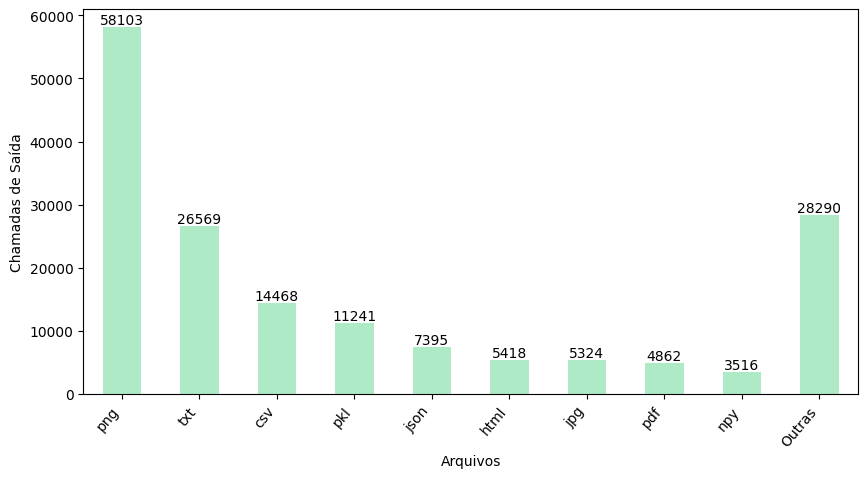

In [101]:
fig17, ax17 = plt.subplots(figsize=(10, 5))
extensions = outputs.infered_file_extension.dropna().value_counts().rename_axis("Extension").to_frame("Count")
other_value = extensions[9:]["Count"].sum()
new_extensions = extensions[:9].copy()
new_extensions.loc["Outras"] = [other_value]

new_extensions.plot.bar(ax=ax17, y="Count", color='#AEEAC6',
                     xlabel='Arquivos', ylabel='Chamadas de Saída').get_legend().remove()
plt.xticks(rotation=50, ha='right')
ax17.bar_label(ax17.containers[0], label_type='edge')
fig17.savefig("outputs/a5/outputs.png", dpi=500, bbox_inches='tight', format='png');